## Get familiar with OMXnx

## Environment setup

In [1]:
import networkx as nx
import osmnx as ox

## Get street network from OpenStreetMap

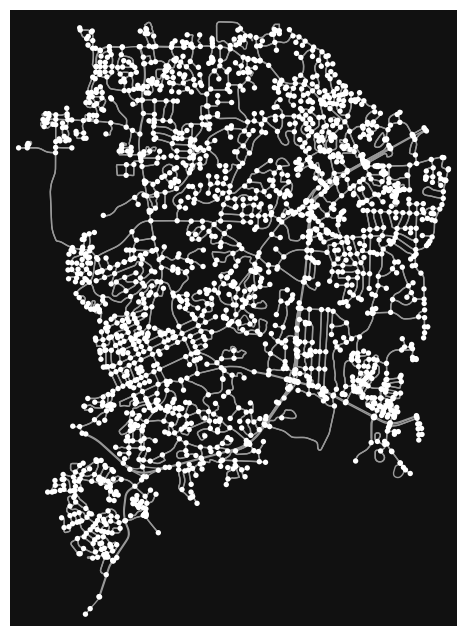

In [4]:
G = ox.graph.graph_from_place('Chapel Hill, North Carolina, USA', network_type='drive')
fig, ax = ox.plot.plot_graph(G)

OMXnx could get street network from OpenStreetMap by specifying either geocodes, polygon boundary, bounding box, or point buffer

Example:

- ox.graph_from_address
- ox.graph_from_bbox
- ox.graph_from_polygon
- ox.graph_from_point
- ox.graph_from_gdfs
- ox.graph_from_place


Network type:

- 'all' - download all OSM streets and paths, including private-access ones (this is the default network type unless you specify a different one
- 'all_public' - download all non-private OSM streets and paths
- 'bike' - get all streets and paths that cyclists can use
- 'drive' - get drivable public streets (but not service roads)
- 'drive_service' - get drivable streets, including service roads
- 'walk' - get all streets and paths that pedestrians can use

## Some basic street network stats

In [5]:
# Covered size measured in square meters
G_proj = ox.projection.project_graph(G)
nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.union_all().convex_hull.area
graph_area_m

65769788.526072666

In [ ]:
# Some basic stats
ox.stats.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 2163,
 'm': 5084,
 'k_avg': 4.700878409616274,
 'edge_length_total': 761269.448385965,
 'edge_length_avg': 149.73828646458793,
 'streets_per_node_avg': 2.5977808599167824,
 'streets_per_node_counts': {0: 0, 1: 559, 2: 40, 3: 1284, 4: 272, 5: 8},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2584373555247342,
  2: 0.01849283402681461,
  3: 0.5936199722607489,
  4: 0.12575127138233935,
  5: 0.0036985668053629217},
 'intersection_count': 1604,
 'street_length_total': 415356.6541011224,
 'street_segment_count': 2797,
 'street_length_avg': 148.50077014698692,
 'circuity_avg': 1.0997551469166729,
 'self_loop_proportion': 0.013228459063282088,
 'clean_intersection_count': 1375,
 'node_density_km': 32.887440395867124,
 'intersection_density_km': 24.38809726998191,
 'edge_density_km': 11574.758950063831,
 'street_density_km': 6315.3107742845405,
 'clean_intersection_density_km': 20.906255452758806}

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

## Save network to disk

In [7]:
ox.io.save_graphml(G, filepath='./data/network_ch.graphml')